In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
import keras.layers as tfl
import seaborn as sn
import dataset

Integrated part for dataset preprocessing and splitting

In [2]:
# interfacce function to get splited dataset
# resize all audio to (1841,19) matrix
dataset_collection = dataset.getMFCCDataset(train_size = 0.6, valid_size = 0.2, test_size = 0.2, cut = False, max_len = 1841)

X_train = dataset_collection['X_train']
Y_train = dataset_collection['Y_train']
X_valid = dataset_collection['X_valid']
Y_valid = dataset_collection['Y_valid']
X_test = dataset_collection['X_test']
Y_test = dataset_collection['Y_test']

X_train_norm = dataset_collection['X_train_norm']
X_valid_norm = dataset_collection['X_valid_norm']
X_test_norm = dataset_collection['X_test_norm']

C:\Users\zhuq6\Desktop\cs230-main\dataset.py:49: RuntimeWarning: invalid value encountered in true_divide
  X_train_norm = (X_train - X_train_miu)/X_train_std
C:\Users\zhuq6\Desktop\cs230-main\dataset.py:50: RuntimeWarning: invalid value encountered in true_divide
  X_valid_norm = (X_valid - X_valid_miu)/X_valid_std
C:\Users\zhuq6\Desktop\cs230-main\dataset.py:51: RuntimeWarning: invalid value encountered in true_divide
  X_test_norm = (X_test - X_test_miu)/X_test_std


In [3]:
# convert array to tensor
X_train_norm = tf.convert_to_tensor(X_train_norm)
X_valid_norm = tf.convert_to_tensor(X_valid_norm)
X_test_norm = tf.convert_to_tensor(X_test_norm)
Y_train = tf.convert_to_tensor(Y_train)
Y_valid = tf.convert_to_tensor(Y_valid)
Y_test = tf.convert_to_tensor(Y_test)

X_train = tf.convert_to_tensor(X_train)
X_valid = tf.convert_to_tensor(X_valid)
X_test = tf.convert_to_tensor(X_test)

In [4]:
# flatten the shape
#X_train_norm_flat = tf.reshape(X_train_norm, [540, -1])
#X_valid_norm_flat = tf.reshape(X_valid_norm, [180, -1])
#X_test_norm_flat = tf.reshape(X_test_norm, [180, -1])

In [14]:
print(X_train.shape)

(540, 1841, 19)


In [9]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> Softmax -> MAXPOOL -> FLATTEN -> DENSE
    
    Arguments:
    input_mfcc -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_mfcc = tf.keras.Input(shape=input_shape)
    ## CONV1D: 4 filters 8, stride of 1, padding 'SAME'
    Z1 = tfl.Conv1D(filters = 4, kernel_size = 8, strides = 2, padding='same', kernel_initializer = 'he_normal', kernel_regularizer = 'L1')(input_mfcc)
    ## RELU
    A1 = tfl.ReLU()(Z1)
    ## MAXPOOL: window 8, stride 4, padding 'SAME'
    P1 = tfl.MaxPool1D(pool_size = 8, strides = 4, padding='same')(A1)
    
    ## CONV1D: 2 filters 4, stride 1, padding 'SAME'
    Z2 = tfl.Conv1D(filters = 4, kernel_size = 4, strides = 2, padding='same', kernel_initializer = 'he_normal', kernel_regularizer = 'L1')(P1)
    ## RELU
    A2 = tfl.ReLU()(Z2)
    ## MAXPOOL: window 4, stride 2, padding 'SAME'
    P2 = tfl.MaxPool1D(pool_size = 4, strides = 2, padding='same')(A2)
    ## FLATTEN
    F = tfl.Flatten()(P2)
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    outputs = tfl.Dense(3, activation='softmax')(F)
    
    model = tf.keras.Model(inputs=input_mfcc, outputs=outputs)
    return model

In [10]:
conv_model = convolutional_model((1841, 19))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1841, 19)]        0         
                                                                 
 conv1d_2 (Conv1D)           (None, 921, 4)            612       
                                                                 
 re_lu_1 (ReLU)              (None, 921, 4)            0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 231, 4)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 116, 4)            68        
                                                                 
 re_lu_2 (ReLU)              (None, 116, 4)            0         
                                                           

In [11]:
history = conv_model.fit(X_train_norm, Y_train, epochs=100, validation_data=(X_valid_norm, Y_valid))
# history2 = conv_model.fit(X_train, Y_train, epochs=100, validation_data=(X_valid, Y_valid))

Epoch 1/100
17/17 [==============================] - 1s 24ms/step - loss: 1.9759 - accuracy: 0.4759 - val_loss: 1.6585 - val_accuracy: 0.5333
Epoch 2/100
17/17 [==============================] - 0s 20ms/step - loss: 1.5362 - accuracy: 0.6426 - val_loss: 1.4457 - val_accuracy: 0.6389
Epoch 3/100
17/17 [==============================] - 0s 8ms/step - loss: 1.3566 - accuracy: 0.6944 - val_loss: 1.3731 - val_accuracy: 0.6722
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 1.2548 - accuracy: 0.7352 - val_loss: 1.3155 - val_accuracy: 0.6778
Epoch 5/100
17/17 [==============================] - 0s 18ms/step - loss: 1.1897 - accuracy: 0.7685 - val_loss: 1.2688 - val_accuracy: 0.7056
Epoch 6/100
17/17 [==============================] - 0s 27ms/step - loss: 1.1351 - accuracy: 0.8093 - val_loss: 1.2399 - val_accuracy: 0.7111
Epoch 7/100
17/17 [==============================] - 0s 16ms/step - loss: 1.0907 - accuracy: 0.8296 - val_loss: 1.2064 - val_accuracy: 0.7333
Epoch 8/

17/17 [==============================] - 0s 10ms/step - loss: 0.2570 - accuracy: 1.0000 - val_loss: 0.3040 - val_accuracy: 0.9833
Epoch 59/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2530 - accuracy: 0.9981 - val_loss: 0.2972 - val_accuracy: 0.9833
Epoch 60/100
17/17 [==============================] - 0s 14ms/step - loss: 0.2489 - accuracy: 1.0000 - val_loss: 0.2892 - val_accuracy: 0.9778
Epoch 61/100
17/17 [==============================] - 0s 25ms/step - loss: 0.2459 - accuracy: 0.9981 - val_loss: 0.2894 - val_accuracy: 0.9778
Epoch 62/100
17/17 [==============================] - 0s 24ms/step - loss: 0.2470 - accuracy: 0.9963 - val_loss: 0.2930 - val_accuracy: 0.9833
Epoch 63/100
17/17 [==============================] - 0s 19ms/step - loss: 0.2425 - accuracy: 1.0000 - val_loss: 0.2861 - val_accuracy: 0.9778
Epoch 64/100
17/17 [==============================] - 0s 25ms/step - loss: 0.2387 - accuracy: 0.9963 - val_loss: 0.2739 - val_accuracy: 0.9833
Epoch 65/100


C:\Users\zhuq6\AppData\Local\Temp\ipykernel_13644\903421272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\zhuq6\AppData\Local\Temp\ipykernel_13644\903421272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

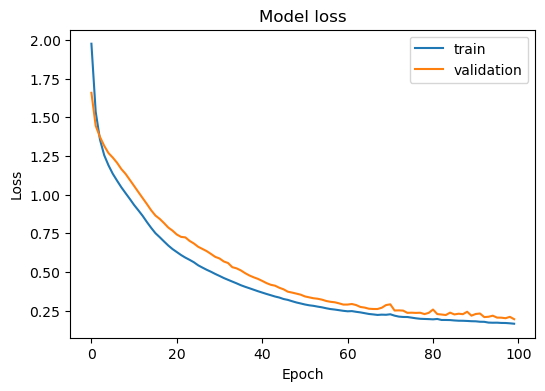

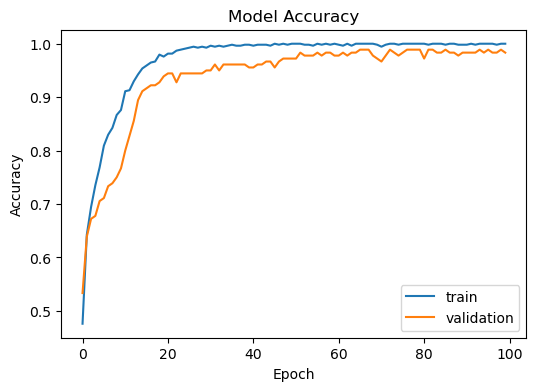

In [12]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(6,4)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch',ylabel='Accuracy')

Display the confusion matrix

6/6 [==============================] - 0s 3ms/step


[Text(0.5, 23.52222222222222, 'prediction'),
 Text(50.722222222222214, 0.5, 'actual')]

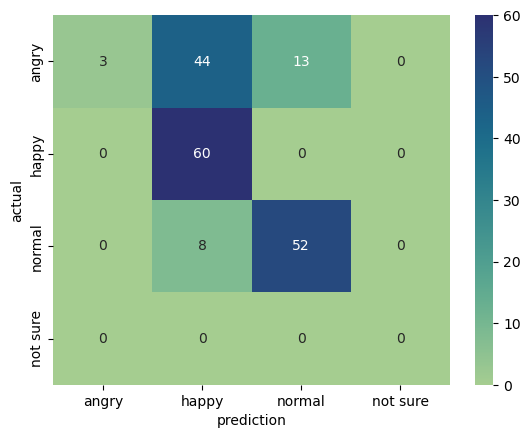

In [13]:
Y_pred = conv_model.predict(X_test)
Y_test_numpy = Y_test.numpy()
emotion_pred = []
emotion_test = []
for i in range(len(Y_pred)):
    if (Y_pred[i][0] > 0.5):
        emotion_pred.append(0) # angry
    elif (Y_pred[i][1] > 0.5):
        emotion_pred.append(1) # happy
    elif (Y_pred[i][2] > 0.5):
        emotion_pred.append(2) # normal
    else:
        emotion_pred.append(3) # not decided

    if (Y_test_numpy[i][0] > 0.5):
        emotion_test.append(0)
    elif (Y_test_numpy[i][1] > 0.5):
        emotion_test.append(1)
    elif (Y_test_numpy[i][2] > 0.5):
        emotion_test.append(2)

emotion_test = tf.convert_to_tensor(emotion_test)
emotion_pred = tf.convert_to_tensor(emotion_pred)

confusion = tf.math.confusion_matrix(emotion_test, emotion_pred, num_classes = 4)

df=pd.DataFrame(confusion.numpy(),index=['angry', 'happy', 'normal', 'not sure'],columns=['angry', 'happy', 'normal', 'not sure'])
confusiton_map = sn.heatmap(df,annot=True, cmap='crest')
confusiton_map.set(xlabel="prediction", ylabel="actual")